In [58]:
import bz2
import json
from sklearn.model_selection import train_test_split 
import pandas
import time
import datetime
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
import pandas

In [59]:
def readFeaturesWithSums(jsonTest,test):
    res=[]
    #res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum','r_lh_sum',
    #            'd_lh_sum','d_killers_count','r_killers_count'])
    res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum','r_abil_sum','d_abil_sum'])
    #res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum'])
    with bz2.BZ2File(jsonTest) as matches_file:
        for line in matches_file:
            match = json.loads(line)
            r_xp_sum=0
            d_xp_sum=0
            r_gold_sum=0
            d_gold_sum=0
            r_lh_sum=0
            d_lh_sum=0
            r_abil_sum=0
            d_abil_sum=0
            r_killers_count=len(match['players'][0]['kills_log'])
            +len(match['players'][1]['kills_log'])
            +len(match['players'][2]['kills_log'])
            +len(match['players'][3]['kills_log'])
            +len(match['players'][4]['kills_log'])
            d_killers_count=len(match['players'][5]['kills_log'])
            +len(match['players'][6]['kills_log'])
            +len(match['players'][7]['kills_log'])
            +len(match['players'][8]['kills_log'])
            +len(match['players'][9]['kills_log'])
            
            
            r_abil_sum=len(match['players'][0]['ability_upgrades'])
            +len(match['players'][1]['ability_upgrades'])
            +len(match['players'][2]['ability_upgrades'])
            +len(match['players'][3]['ability_upgrades'])
            +len(match['players'][4]['ability_upgrades'])
            d_abil_sum=len(match['players'][5]['ability_upgrades'])
            +len(match['players'][6]['ability_upgrades'])
            +len(match['players'][7]['ability_upgrades'])
            +len(match['players'][8]['ability_upgrades'])
            +len(match['players'][9]['ability_upgrades'])
                       
            for i in range(len(match['times'])):
                if(match['times'][i]<=5*60):
                    r_xp_sum=match['players'][0]['xp_t'][i]+match['players'][1]['xp_t'][i]+match['players'][2]['xp_t'][i]+match['players'][3]['xp_t'][i]+match['players'][4]['xp_t'][i]
        
                    d_xp_sum=match['players'][5]['xp_t'][i]\
                    +match['players'][6]['xp_t'][i]\
                    +match['players'][7]['xp_t'][i]\
                    +match['players'][8]['xp_t'][i]\
                    +match['players'][9]['xp_t'][i]
        
                    r_gold_sum=match['players'][0]['gold_t'][i]\
                    +match['players'][1]['gold_t'][i]\
                    +match['players'][2]['gold_t'][i]\
                    +match['players'][3]['gold_t'][i]\
                    +match['players'][4]['gold_t'][i]
        
                    d_gold_sum=match['players'][5]['gold_t'][i]\
                    +match['players'][6]['gold_t'][i]\
                    +match['players'][7]['gold_t'][i]\
                    +match['players'][8]['gold_t'][i]\
                    +match['players'][9]['gold_t'][i]
     
                    r_lh_sum=match['players'][0]['lh_t'][i]\
                    +match['players'][1]['lh_t'][i]\
                    +match['players'][2]['lh_t'][i]\
                    +match['players'][3]['lh_t'][i]\
                    +match['players'][4]['lh_t'][i]
        
                    d_lh_sum=match['players'][5]['lh_t'][i]\
                    +match['players'][6]['lh_t'][i]\
                    +match['players'][7]['lh_t'][i]\
                    +match['players'][8]['lh_t'][i]\
                    +match['players'][9]['lh_t'][i]
            #res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,
            #            r_lh_sum,d_lh_sum,d_killers_count,d_killers_count])
            res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,r_abil_sum,d_abil_sum])
            #res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum])
    import csv
    with open('tmp.csv', 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        spamwriter.writerows(res)
    features = pandas.read_csv(test)    
    s = pandas.read_csv('./tmp.csv', index_col='match_id')
    result = pandas.merge(features, s, left_on='match_id', right_index=True, how='left', sort=False)
    return result

In [ ]:
#features=pandas.read_csv('features.csv')
#test=pandas.read_csv('features_test.csv')
test=readFeaturesWithSums('matches_test.jsonlines.bz2','features_test.csv')
print('test')
features=readFeaturesWithSums('matches.jsonlines.bz2','features.csv')
print('features')
features.fillna(0,inplace=True)
test.fillna(0,inplace=True)
y=features['radiant_win']
features=features.drop(['duration','radiant_win','tower_status_radiant',
              'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
from sklearn.linear_model import LogisticRegression

#features=features.drop(['duration','tower_status_radiant',
#              'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
#clf=GradientBoostingClassifier(n_estimators=200, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(features, y,test_size=0.2,random_state=42)
#clf.fit(X_train,y_train)
#pred=clf.predict_proba(X_test)[:,1]
#clf.fit(features,y)
#print('fit, yea')
#print(roc_auc_score(y_test,pred))
#print(getMetrics(200))
'''total=[]
total.append(["match_id","radiant_win"])
for i in range(0,len(match_id)):
    total.append([match_id[i],pred[i]])
import csv
with open('res.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(total)
('done')'''

test


In [41]:
for column in features.columns.values:
    features[column]=(features[column]-features[column].mean())/features[column].std()
for column in test.columns.values:
    test[column]=(test[column]-test[column].mean())/test[column].std()
clf=LogisticRegression(C=0.0001,penalty='l2')
clf.fit(features,y)
pred=clf.predict_proba(test)[:,1]
match_id=pandas.read_csv('./features_test.csv')['match_id']
total=[]
total.append(["match_id","radiant_win"])
for i in range(0,len(match_id)):
    total.append([match_id[i],pred[i]])
import csv
with open('answer.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(total)

In [42]:
clf=GradientBoostingClassifier(n_estimators=200, random_state=42)
clf.fit(features,y)
pred=clf.predict_proba(test)[:,1]
match_id=pandas.read_csv('./features_test.csv')['match_id']
total=[]
total.append(["match_id","radiant_win"])
for i in range(0,len(match_id)):
    total.append([match_id[i],pred[i]])
import csv
with open('answer.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(total)

In [18]:
#Repeat good models
d_features=features
d_y=y
d_test=test
d_clf=GradientBoostingClassifier(n_estimators=180, random_state=42,max_depth=7)
d_clf.fit(d_features,d_y)
d_pred=d_clf.predict_proba(d_test)[:,1]
d_match_id=pandas.read_csv('./features_test.csv')['match_id']
d_total=[]
d_total.append(["match_id","radiant_win"])
for i in range(0,len(d_match_id)):
    d_total.append([d_match_id[i],d_pred[i]])
import csv
with open('d_res.csv', 'w', newline='') as csvfile:
    d_spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    d_spamwriter.writerows(d_total)

In [33]:
def getMetrics(n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=GradientBoostingClassifier(n_estimators=n, random_state=42)
    for train,test in kf.split(features,y):
        clf.fit(features.iloc[train],y.iloc[train])
        pred=clf.predict_proba(features.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

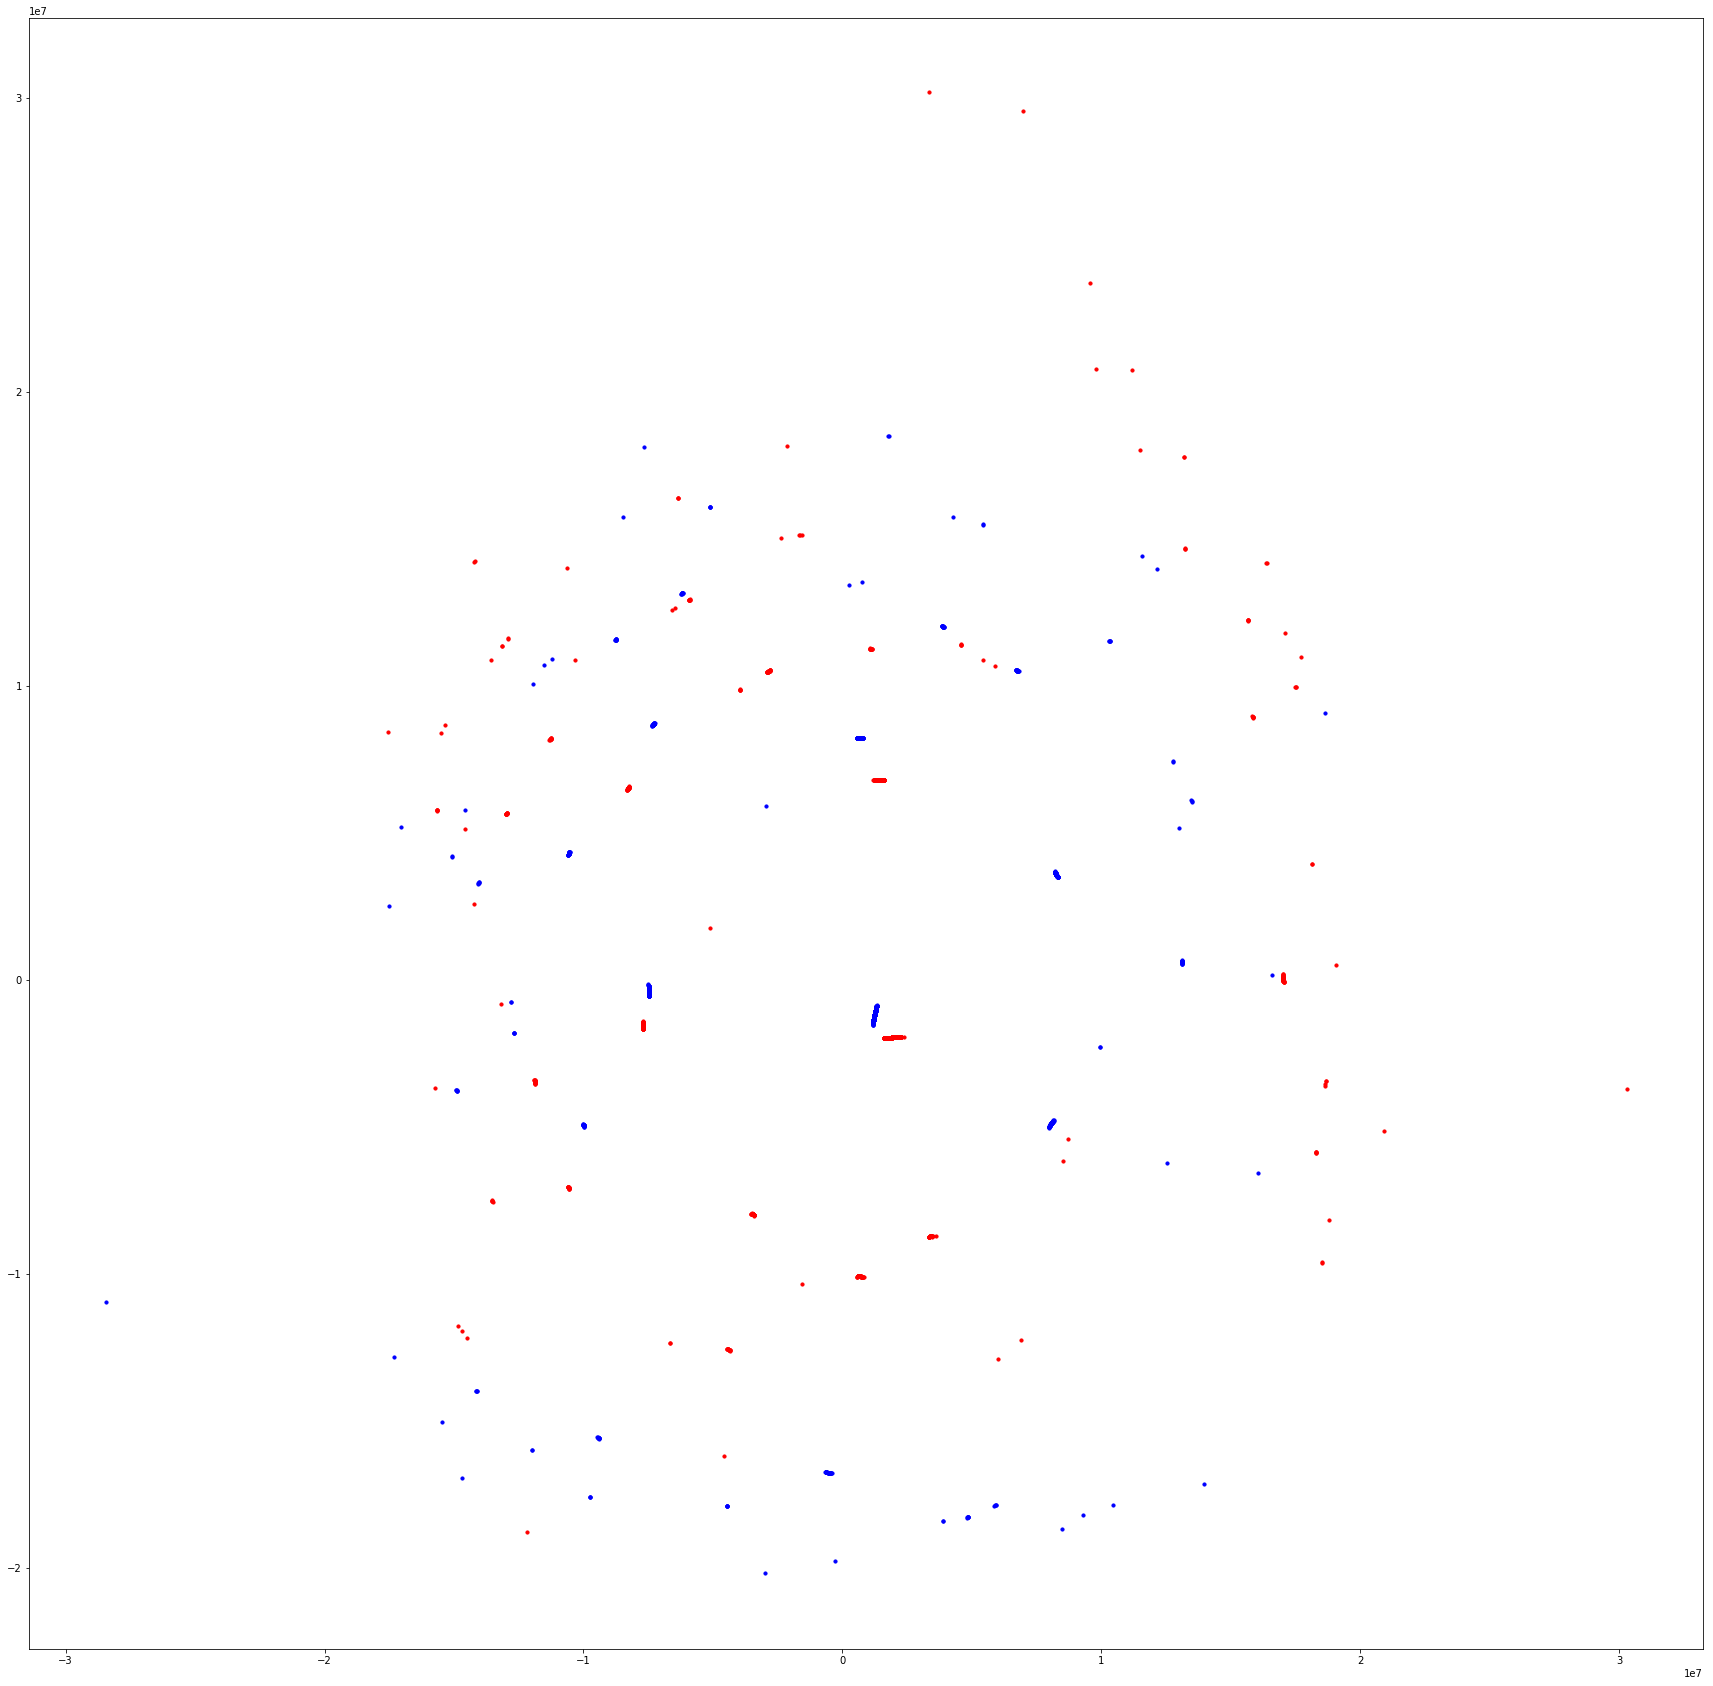

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
win=features[features.radiant_win==1][:1000]
lost=features[features.radiant_win==0][:1000]
x1=win_embedded.embedding_[:,0];
y1=win_embedded.embedding_[:,1];
x2=lost_embedded.embedding_[:,0]
y2=lost_embedded.embedding_[:,1]
plt.figure(figsize=(30,30))
plt.scatter(x1,y1,color="red",s=10)
plt.scatter(x2,y2,color="blue",s=10)
#plt.colorbar(scatter)
#plt.axis([3000,7000,3000,7000])
plt.show()

In [33]:
#winners=features[features.radiant_win==1].loc[:,'r_xp_sum':'d_abil_sum']
#loosers=features[features.radiant_win==0].loc[:,'r_xp_sum':'d_abil_sum']
winners=features[features.radiant_win==1]
loosers=features[features.radiant_win==0]
#'r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum','r_abil_sum','d_abil_sum'

In [ ]:
from sklearn.manifold import MDS
win_embedded = MDS(n_components=2,random_state=42).fit(winners[:10000])
print('win')
lost_embedded=MDS(n_components=2,random_state=42).fit(loosers[:10000])
print('lost')

In [34]:
def getLogMetrics(n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=LogisticRegression(C=n,penalty='l2',)
    for train,test in kf.split(features,y):
        clf.fit(features.iloc[train],y.iloc[train])
        pred=clf.predict_proba(features.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

In [40]:
print(getLogMetrics(0.0001))

0.844773232791


In [60]:
for name in list(features.columns.values):
    features[name]=features[name].fillna(features[name].mean(),inplace=True)

In [48]:
def fillHeroMatrix(features):
    X_pick = np.zeros((features.shape[0], 113))
    for i, match_id in enumerate(features.index):
        for p in range(5):
            X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]] = 1
            X_pick[i, features.loc[match_id, 'd%d_hero' % (p+1)]] = -1
    X_pick[:,0]=features.index
    X_df=pandas.DataFrame(X_pick)
    X_df.set_index(0)
    X_df=X_df.rename(columns={0:'index'})
    X_df=X_df.set_index('index')
    new_features=features.join(X_df,how='right')
    new_features=new_features.drop(['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero'],axis=1)
    return new_features

In [49]:
features=fillHeroMatrix(features)
features.columns.values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [64]:
#X_pick[i, features.loc[match_id, 'r%d_hero' % (p+1)]] = 1
test

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,r_abil_sum,d_abil_sum
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
